# Univariate Linear Regression

## Introduction

In this exercise, we will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

    NOTE: The example and sample data is being taken from the "Machine Learning course by Andrew Ng" in Coursera.


In [1]:
# initial imports
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
import seaborn as sns

# setting graph properties
plt.rcParams['figure.dpi'] = 300  # setting figure dpi for better quality graphs
plt.rcParams['figure.figsize'] = [10,8]
sns.set(context="notebook", style="white")  # graph styling using seaborn
%config InlineBackend.figure_format = 'svg'

In [2]:
# imports from my models designed for these examples
from models.linear_regression import compute_cost, gradient_descent, compute_gradient
from models.data_preprocessing import add_bias_unit

## Plottig Data

Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, we are using a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.)

Loading data ...
The First 5 elements of the loaded data are 
[[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]]


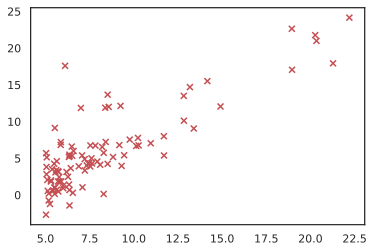

In [3]:
# Loading X and y matrix
print('Loading data ...')

data = np.loadtxt('data/ex1data1.txt', delimiter=',')
X = data[:, 0:-1]
y = data[:, -1:]
m = y.shape[0]

# printing first 5 elements
print("The First 5 elements of the loaded data are \n{}".format(X[0:5]))

# ----------------Plotting Data-----------------
fig = plt.figure("data")
axes1 = fig.add_subplot()
axes1.scatter(X, y, marker="x", c='r');

## Gradient Descent

In this part we will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

### Update equation

The objective of linear regression is to minimize the cost function:

$$ J(\theta) = \frac{1}{2m}\sum_{i=1}^{m} \left( h_{\theta}\left( x^{(i)} \right) - y^{(i)} \right) ^{2} $$

where the hypothesis $h_{\theta}(x)$ is given by the linear model :
$$ 
h_{\theta}(x) = \theta^{T}x = \theta_{0} + \theta_{1}x_{1}
$$

the parameters of our model are the $\theta_{j}$ values. These are the values we will adjust to minimize cost J(θ). One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update 

$
\theta_{j} := \theta_{j} - \alpha \frac{1}{m} \sum_{i=1}^{m} \left(h_{\theta} \left(x^{(i)}\right) -y^{(i)}\right)x^{(i)}_{j}$  (simultaneously update $\theta_{j}$ for all j)  

With each step of gradient descent, our parameters $\theta_{j}$ come closer to the
optimal values that will achieve the lowest cost J(θ).

### Implementation

We have already set up the data needed for linear regression. In the
following lines, we add another dimension to our data to accommodate the $\theta_{0}$ intercept term. We also initialize the initial parameters to 0 and the learning rate alpha to 0.01.

In [4]:
# adding bias units to X
X = add_bias_unit(X)

# Some gradient descent settings
iterations = 1500
alpha = 0.01
theta = np.zeros([X.shape[1], 1])

### Computing the cost J($\theta$)

As you perform gradient descent to learn minimize the cost function J(θ), it is helpful to monitor the convergence by computing the cost.  
In this section, we will run the compute_cost function to calculate J(θ) so you can check the convergence of your gradient descent implementation.

In [5]:
print('Testing the cost function ...')
# compute and display initial cost
J = compute_cost(X, y, theta);
print('With theta = [0 ; 0]\nCost computed = {}'.format(J))
print('Expected cost value (approx) 32.07')

# further testing of the cost function
J = compute_cost(X, y, np.array([[-1], [2]]))
print('\nWith theta = [-1 ; 2]\nCost computed = {}'.format(J))
print('Expected cost value (approx) 54.24')

Testing the cost function ...
With theta = [0 ; 0]
Cost computed = [32.07273388]
Expected cost value (approx) 32.07

With theta = [-1 ; 2]
Cost computed = [54.24245508]
Expected cost value (approx) 54.24


### Gradient Descent

In [6]:
print('\nRunning Gradient Descent ...')
# run gradient descent
theta, _  = gradient_descent(X, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent:')
print(theta.ravel())
print('Expected theta values (approx)')
print(' [-3.6303  1.1664]')


Running Gradient Descent ...
Theta found by gradient descent:
[-3.63029144  1.16636235]
Expected theta values (approx)
 [-3.6303  1.1664]


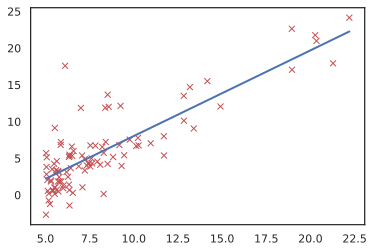

In [7]:
# plotting the linear model
plt.scatter(X[:, 1:], y, marker='x', c='r', lw=1)
plt.plot(X[:,1:], np.dot(X,theta), lw=2);

## Visualizing J($\theta$)

To understand the cost function J(θ) better, you will now plot the cost over
a 2-dimensional grid of θ0 and θ1 values. 
The purpose of these graphs is to show you that how J(θ) varies with
changes in θ0 and θ1. The cost function J(θ) is bowl-shaped and has a global
mininum. (This is easier to see in the contour plot than in the 3D surface
plot). This minimum is the optimal point for θ0 and θ1, and each step of
gradient descent moves closer to this point.

Visualizing J(theta_0, theta_1) ...



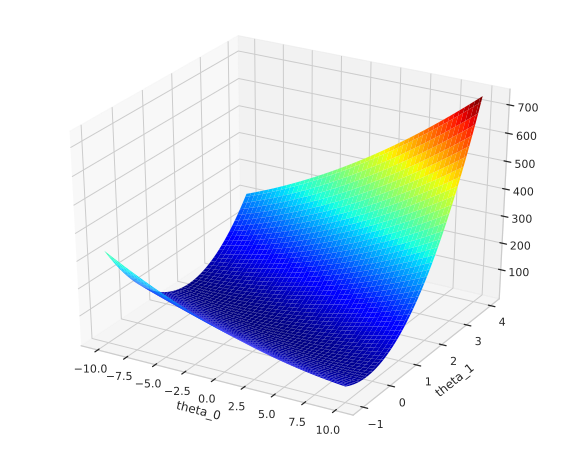

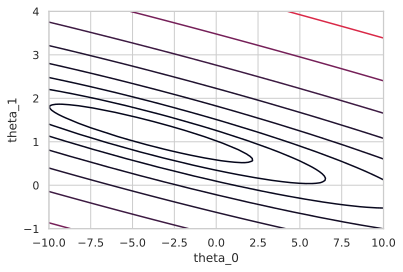

In [11]:
sns.set_style('whitegrid')
#------------------ plotting the J(theta0,theta1)---------------------
print('Visualizing J(theta_0, theta_1) ...\n')

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros([theta0_vals.size, theta1_vals.size])

# Fill out J_vals
for i in range(theta0_vals.size):
    for j in range(theta1_vals.size):
        t = np.array([theta0_vals[i], theta1_vals[j]]).reshape(2,1)
        J_vals[i,j] = compute_cost(X, y, t)


# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

#--------------- Surface plot------------------
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=2, cstride=2, lw=0, cmap=cm.jet)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')

#----------------- Contour plot------------------

fig1 = plt.figure()
ax1 = fig1.add_subplot()

# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax1.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20))
ax1.set_xlabel('theta_0')
ax1.set_ylabel('theta_1');